In [1]:
import os
os.chdir("..\\Sklearn Image Processing")
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.feature import blob_log
            
exec(open(os.path.abspath('image_common_utils.py')).read())   #reading pre traning filed for funtions

##### Image Processing by exploring skimage.feature: Count of White dots

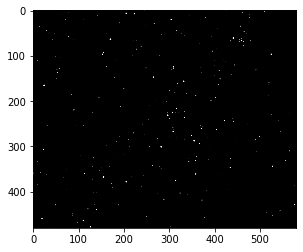

In [2]:
im = imread("./image_data/wint_sky.gif", as_gray=True)
plt.imshow(im, cmap=plt.get_cmap('gray')) # cm.gray
plt.show()

In [3]:
#Now we will fetch binary large objects (blob)
blobs_log = blob_log(im, max_sigma=30, num_sigma=10, threshold=.1)
print(blobs_log.shape)

(308, 3)


In [4]:
#Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * np.sqrt(2)

# Count the white dots
numrows = len(blobs_log)
print("Number of white dots counted : " ,numrows)



Number of white dots counted :  308


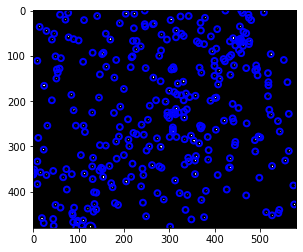

In [5]:
#Step 4 : Validated whether we captured all the white dots
fig, ax = plt.subplots(1, 1)
plt.imshow(im, cmap=plt.get_cmap('gray'))
for blob in blobs_log:
    y, x, r = blob
    c = plt.Circle((x, y), r+5, color='blue', linewidth=2, fill=False)
    ax.add_patch(c)
plt.show()

del(im, blobs_log)